### Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [9]:
def return_log_calculator(df, delay=1):
    ret = np.log(df.pct_change(delay)+1)
    return ret

### Load Data

In [3]:
close = pd.read_csv("sp500_close.csv", index_col=0, parse_dates=True)

In [4]:
goog = close[["GOOG"]].copy().dropna()

In [5]:
goog.head()

,GOOG
2013-02-08,558.46
2013-02-11,558.46
2013-02-12,558.46
2013-02-13,558.46
2013-02-14,558.46


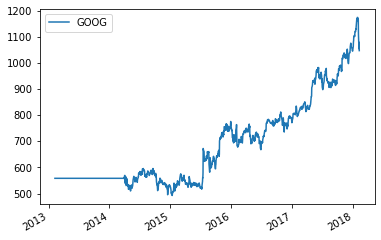

In [8]:
goog.plot();

In [10]:
goog_ret = return_log_calculator(goog, delay=1)

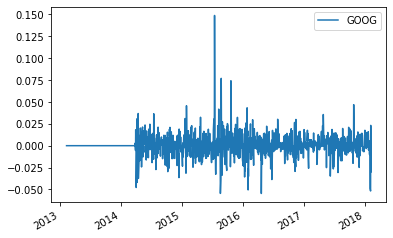

In [11]:
goog_ret.plot();

### SMA

In [12]:
goog["SMA-10"] = goog["GOOG"].rolling(10).mean()

In [14]:
goog.head(20)

,GOOG,SMA-10
2013-02-08,558.46,NaN
2013-02-11,558.46,NaN
2013-02-12,558.46,NaN
2013-02-13,558.46,NaN
2013-02-14,558.46,NaN
2013-02-15,558.46,NaN
2013-02-19,558.46,NaN
2013-02-20,558.46,NaN
2013-02-21,558.46,NaN
2013-02-22,558.46,558.46


In [15]:
type(goog["GOOG"].rolling(10))

pandas.core.window.rolling.Rolling

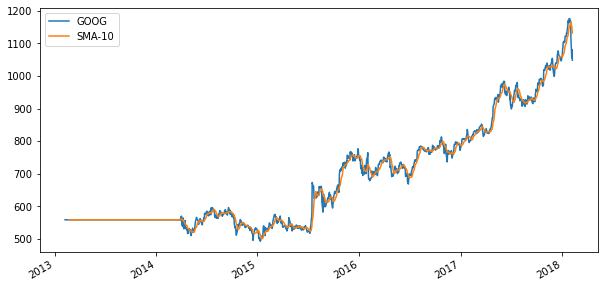

In [17]:
goog.plot(figsize=(10,5));

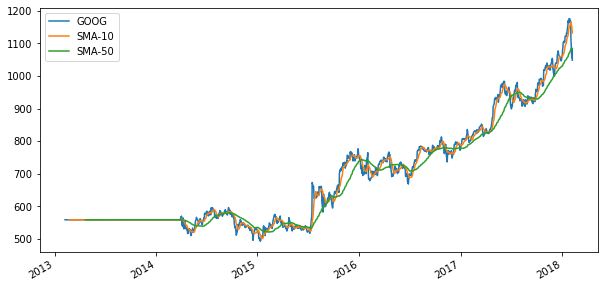

In [18]:
goog["SMA-50"] = goog["GOOG"].rolling(50).mean()
goog.plot(figsize=(10,5));

In [20]:
goog_aapl = close[["GOOG","AAPL"]].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2013-02-08 GOOG          NaN        NaN
           AAPL          NaN        NaN
2013-02-11 GOOG          NaN        NaN
           AAPL          NaN        NaN
2013-02-12 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[2518 rows x 2 columns]

In [21]:
cov.loc["2018-02-07"].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [23]:
goog_aapl_ret = return_log_calculator(goog_aapl, delay=1)
goog_aapl_ret.head()

,GOOG,AAPL
2013-02-08,NaN,NaN
2013-02-11,0.0,0.010368
2013-02-12,0.0,-0.025386
2013-02-13,0.0,-0.001905
2013-02-14,0.0,-0.000900


In [24]:
goog_aapl_ret["GOOG-SMA-50"] = goog_aapl_ret["GOOG"].rolling(50).mean()
goog_aapl_ret["AAPL-SMA-50"] = goog_aapl_ret["AAPL"].rolling(50).mean()

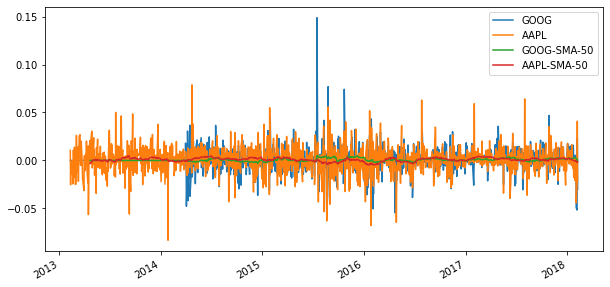

In [25]:
goog_aapl_ret.plot(figsize=(10,5));

In [26]:
cov = goog_aapl_ret[["GOOG-SMA-50", "AAPL-SMA-50"]].rolling(50).cov()
cov.tail()

GOOG-SMA-50   AAPL-SMA-50
2018-02-05 AAPL-SMA-50 -7.715772e-08  1.188405e-06
2018-02-06 GOOG-SMA-50  2.852362e-07 -1.882949e-08
           AAPL-SMA-50 -1.882949e-08  1.329746e-06
2018-02-07 GOOG-SMA-50  3.430702e-07  8.238184e-08
           AAPL-SMA-50  8.238184e-08  1.506869e-06

In [27]:
corr = goog_aapl_ret[["GOOG-SMA-50", "AAPL-SMA-50"]].rolling(50).corr()
corr.tail()

GOOG-SMA-50  AAPL-SMA-50
2018-02-05 AAPL-SMA-50    -0.138433     1.000000
2018-02-06 GOOG-SMA-50     1.000000    -0.030574
           AAPL-SMA-50    -0.030574     1.000000
2018-02-07 GOOG-SMA-50     1.000000     0.114578
           AAPL-SMA-50     0.114578     1.000000